<a href="https://colab.research.google.com/github/nabhonil/kaggle3_group11/blob/main/Nabhonil/M3_Mini_Hackathon_Musical_Emotions_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Objective:

To classify Happy or Sad Emotions in Musical Audio Files using deep learning. Essentially, it a binary classification problem.

### Problem Statement

To build and implement a deep learning model to classify Happy or Sad Emotions in Musical Audio Files dataset.

At the end of this competition, you will be able to:

Load and extract features of wave files available in the Musical Audio Files dataset using librosa.feature.mfcc

Build a deep learning model using either Keras or PyTorch deep learning libraries.

### Description:

Dataset Description: The original dataset contains 7 classes but this is just a subset of the original dataset which contains 2 classes. The audio files in the dataset were already preprocessed by converting them into smaller chunks of equal size. All music were divided into 10 seconds smaller chunks using FFMPEG.

The chunks of the same song have the equally spaced names like : Happy20001-Happy20016(Same song) The last two digits resembles the chunk number while the first three digits are the ID of the original song which is provided as the GroupID. The two classes are: 1.)Happy and 2.)Sad


## Grading = 10 Marks

Here is a handy link to Kaggle's competition documentation (https://www.kaggle.com/docs/competitions), which includes, among other things, instructions on submitting predictions (https://www.kaggle.com/docs/competitions#making-a-submission).

### Instructions for downloading train and test data are as follows:

### 1. Create an API key in Kaggle.

To do this, go to the competition site on Kaggle at (https://www.kaggle.com/t/89d3f0ee9e534c5ab16f40316ff15d0b) and click on user then click on your profile as shown below. Click Account.

![alt text](https://cdn.iisc.talentsprint.com/DLFA/Experiment_related_data/Capture-NLP.PNG)

### 2. Next, scroll down to the API access section and click on **Create New Token** to download an API key (kaggle.json).

![alt text](https://cdn.iisc.talentsprint.com/DLFA/Experiment_related_data/Capture-NLP_1.PNG)

### 3. Upload your kaggle.json file using the following snippet in a code cell:



In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"nabhonilsinha","key":"365b52752cbd72b9f29c24b81adf8ce5"}'}

In [2]:
#If successfully uploaded in the above step, the 'ls' command here should display the kaggle.json file.
%ls

kaggle.json  sample_data/


### 4. Install the Kaggle API using the following command


In [4]:
!pip install -U -q kaggle==1.5.8

### 5. Move the kaggle.json file into ~/.kaggle, which is where the API client expects your token to be located:



In [5]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [6]:
#Execute the following command to verify whether the kaggle.json is stored in the appropriate location: ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [7]:
!chmod 600 /root/.kaggle/kaggle.json #run this command to ensure your Kaggle API token is secure on colab

### 6. Now download the Test Data from Kaggle

**NOTE: If you get a '403 - Not Found' error after running the cell below, it is most likely that the user (whose kaggle.json is uploaded above) has not 'accepted' the rules of the competition and therefore has 'not joined' the competition.**

If you encounter **401-unauthorised** download latest **kaggle.json** by repeating steps 1 & 2

In [8]:
#If you get a forbidden link, you have most likely not joined the competition.
!kaggle competitions download -c classification-of-musical-emotions-of-audio-files
!unzip classification-of-musical-emotions-of-audio-files

100% 640M/641M [00:34<00:00, 24.2MB/s]
100% 641M/641M [00:34<00:00, 19.2MB/s]
Archive:  classification-of-musical-emotions-of-audio-files.zip
  inflating: Test/Test/1.wav         
  inflating: Test/Test/10.wav        
  inflating: Test/Test/100.wav       
  inflating: Test/Test/101.wav       
  inflating: Test/Test/102.wav       
  inflating: Test/Test/103.wav       
  inflating: Test/Test/104.wav       
  inflating: Test/Test/105.wav       
  inflating: Test/Test/106.wav       
  inflating: Test/Test/107.wav       
  inflating: Test/Test/108.wav       
  inflating: Test/Test/109.wav       
  inflating: Test/Test/11.wav        
  inflating: Test/Test/110.wav       
  inflating: Test/Test/111.wav       
  inflating: Test/Test/112.wav       
  inflating: Test/Test/113.wav       
  inflating: Test/Test/114.wav       
  inflating: Test/Test/115.wav       
  inflating: Test/Test/116.wav       
  inflating: Test/Test/117.wav       
  inflating: Test/Test/118.wav       
  inflating: Test/Test

### YOUR CODING STARTS FROM HERE

### Import Neccesary Packages

In [9]:
import torch
from torch.utils.data import Dataset, DataLoader
import numpy as np
import torch.nn as nn
from tqdm import tqdm
import librosa
from pathlib import Path
import torch.nn.functional as F
import matplotlib.pyplot as plt

### **Stage 1:** Load the Train data audio files (1 point)




#### Play the sample audio

In [10]:
data_path = 'Train/Train/'

### **Stage 2:** Data Exploration and Visualization (1 point)


*  Find count of each label and plot bar graph



1873
1873
['Sad/Sad23504.wav', 'Sad/Sad23532.wav', 'Sad/Sad21840.wav', 'Sad/Sad42200.wav', 'Sad/Sad36009.wav', 'Sad/Sad36008.wav', 'Sad/Sad33415.wav', 'Sad/Sad19505.wav', 'Sad/Sad36908.wav', 'Sad/Sad17416.wav', 'Sad/Sad22520.wav', 'Sad/Sad31701.wav', 'Sad/Sad40501.wav', 'Sad/Sad30019.wav', 'Sad/Sad40515.wav', 'Sad/Sad19806.wav', 'Sad/Sad38815.wav', 'Sad/Sad22218.wav', 'Sad/Sad14100.wav', 'Sad/Sad30012.wav', 'Sad/Sad38615.wav', 'Sad/Sad33100.wav', 'Sad/Sad40801.wav', 'Sad/Sad14409.wav', 'Sad/Sad22225.wav', 'Sad/Sad44418.wav', 'Sad/Sad25707.wav', 'Sad/Sad22519.wav', 'Sad/Sad23913.wav', 'Sad/Sad16002.wav', 'Sad/Sad11604.wav', 'Sad/Sad12921.wav', 'Sad/Sad37604.wav', 'Sad/Sad40505.wav', 'Sad/Sad25911.wav', 'Sad/Sad21828.wav', 'Sad/Sad38801.wav', 'Sad/Sad31709.wav', 'Sad/Sad27306.wav', 'Sad/Sad33103.wav', 'Sad/Sad22001.wav', 'Sad/Sad17410.wav', 'Sad/Sad20513.wav', 'Sad/Sad35215.wav', 'Sad/Sad36013.wav', 'Sad/Sad16204.wav', 'Sad/Sad25921.wav', 'Sad/Sad33104.wav', 'Sad/Sad31723.wav', 'Sad/Sad3

<BarContainer object of 2 artists>

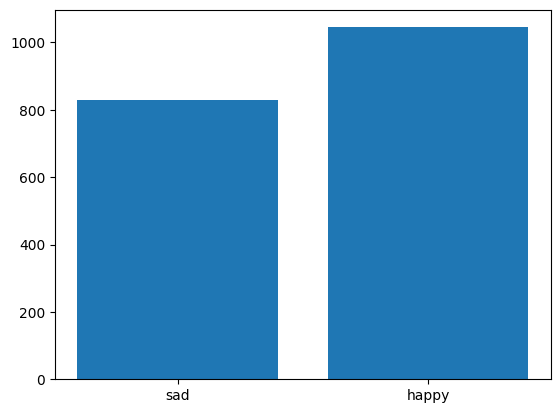

In [11]:
# Function to get the .wav files and Map the labels for each wav file
def get_files(path, extension='.wav'):
    return list(path.rglob(f'*{extension}'))

all_files = get_files(Path(data_path))
print(len(all_files))

# # storing 2 Emotion as Speakers
labels_inc_files =[]
count_of_happy = 0
count_of_sad = 0

for l in all_files :
    label_file = str(l).split('/')[-2] + "/" + str(l).split('/')[-1]
    labels_inc_files.append(label_file)
    if label_file.find('Happy') :
        count_of_happy = count_of_happy + 1
    else :
        count_of_sad = count_of_sad + 1

print (len(labels_inc_files))
print (labels_inc_files)
print (count_of_happy)
print (count_of_sad)

values = [count_of_sad, count_of_happy]
labels = ['sad', 'happy']
plt.bar(labels, values)

#### Visualize sample audio signal using librosa

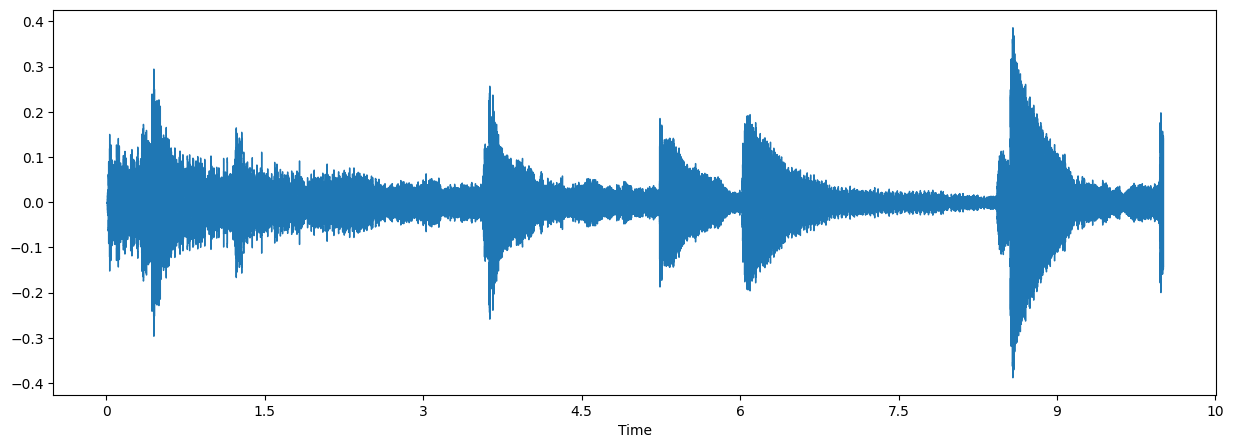

In [12]:
import librosa.display

sample_audio_path = data_path + labels_inc_files[0]

# librosa is used for analyzing and extracting features of an audio signal
data, sampling_rate = librosa.load(sample_audio_path)
plt.figure(figsize=(15, 5))

# librosa.display.waveshow is used to plot waveform of amplitude vs time
librosa.display.waveshow(data, sr=sampling_rate)
plt.show()

### **Stage 3:** Feature extraction (2 points)


In [13]:
# Prepare the EmotionDataset for train and test
class EmotionDataset(Dataset):
    def __init__(self, mode, soundList):
        self.sound_dict = soundList
        self.sound_file = [l.split('/')[1] for l in soundList ]
        if mode == 'train':
            self.emotion = [l.split('/')[0] for l in soundList ]

    def __len__(self):
        return len(self.sound_file)

    def __get__(self, idx):
        # Load an audio file as a floating point time series
        # which returns audio time series and sampling rate of y
        data, sampling_rate = librosa.load(datapath + self.label_dict[idx])
        # Mel-frequency cepstral coefficients (MFCCs), represents the short-term power spectrum of a sound
        # number of MFCCs to return is 13 over each time frame
        mfcc = librosa.feature.mfcc(y=data, sr=sampling_rate, n_mfcc=13).T
        return torch.from_numpy(mfcc), self.emotion[idx]

class BatchPadCollafeFn():
     """ padding sequential data to max length of a batch.
     Zero-pads model inputs and targets based on number of frames per step """
     def __init__(self):
        pass
     def __call__(self, batch):
        # zero-pad all one-hot text sequences to max input length
        input_lengths, ids_sorted_decreasing = torch.sort(
            torch.LongTensor([len(x[0]) for x in batch]),
            dim=0, descending=True)
        max_input_len = input_lengths[0]
        mfcc_padded = torch.LongTensor(len(batch), max_input_len, batch[ids_sorted_decreasing[0]][0].shape[-1])
        mfcc_padded.zero_()
        labels = torch.LongTensor(len(batch))
        for i in range(len(ids_sorted_decreasing)):
            mfcc = batch[ids_sorted_decreasing[i]][0]
            mfcc_padded[i, :mfcc.shape[0], :] = mfcc
            labels[i] = batch[ids_sorted_decreasing[i]][1]
        return mfcc_padded, labels

### **Stage 4:** Train the model  (4 points)


In [19]:
# Train the dataset
traindataset = EmotionDataset(mode='train', soundList=labels_inc_files)
print(len(traindataset))

batch_size = 20

# A custom collate_fn can be used to customize collation, e.g., padding sequential data to max length of a batch
trainloader = DataLoader(traindataset, batch_size=batch_size, collate_fn=BatchPadCollafeFn())
print(len(trainloader))

1873
94


In [15]:
class Model(nn.Module):
    def __init__(self, in_channel=13):
        super().__init__()
        self.conv1 = nn.Conv1d(in_channel, 32, 3)
        self.conv2 = nn.Conv1d(32, 64, 3)
        self.conv3 = nn.Conv1d(64, 128, 3)
        self.dense = nn.Linear(128, 8)

    def forward(self, x):
        x = x.permute(0, 2, 1)
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = F.relu(self.conv3(x))
        x = torch.mean(x, -1)

        return self.dense(x)

In [16]:
def train(loader):
    model.train()
    n_classes = 8
    # Cross entropy as loss function
    lossfn = nn.CrossEntropyLoss()

    # Define the confusion matrix with zeros of no of classes
    confusion_matrix = torch.zeros(n_classes, n_classes)

    losses = []
    for data, label in tqdm(loader):

        # Convert data and labels to torch tensor
        data, label = data.to(device), label.to(device)

        # Pass the data through the model
        out = model(data.float())

        # Calculate the loss
        loss = lossfn(out, label)

        # Zero out the gradients
        optimiser.zero_grad()

        # Do backpropagation
        loss.backward()

        # Update the weights accordingly
        optimiser.step()
        losses.append(loss.item())

        # Take max probability of predictions
        _, preds = torch.max(out, 1)

        # Print the loss and updated confusion matrix with labels original and predictions
        for t, p in zip(label.view(-1), preds.view(-1)):
            confusion_matrix[t.long(), p.long()] += 1
    return sum(losses)/len(losses), confusion_matrix.diag()/confusion_matrix.sum(1)


In [17]:
device = 'cuda'
lr = 0.0001 # Learning rate
model = Model().to(device).float() # Convert the model to cuda runtime
optimiser = torch.optim.Adam(model.parameters(), lr=lr) # Adam optimizer
print(model)

Model(
  (conv1): Conv1d(13, 32, kernel_size=(3,), stride=(1,))
  (conv2): Conv1d(32, 64, kernel_size=(3,), stride=(1,))
  (conv3): Conv1d(64, 128, kernel_size=(3,), stride=(1,))
  (dense): Linear(in_features=128, out_features=8, bias=True)
)


In [22]:
num_epochs = 10
trainloss, trainaccs = [], []
for ep in range(num_epochs):
    loss, accs = train(trainloader)
    trainloss.append(loss)
    trainaccs.append(accs)
    print(trainloss[-1])
    print(trainaccs[-1])

  0%|          | 0/94 [00:00<?, ?it/s]


NotImplementedError: ignored

### **Stage 5:** Kaggle Testset predictions (2 points)



*   Load the test set and extract the features of the .wav files
*   Using the trained model get the predicions on the test set
*   Finally, upload your predictions to the kaggle



In [ ]:
# YOUR CODE HERE